In [143]:
import fastf1 as ff1
import numpy as np
from scipy.signal import savgol_filter
from sklearn.cluster import DBSCAN
from matplotlib import pyplot as plt
import re

In [90]:
ff1.Cache.enable_cache('../cache')
fastf1.plotting.setup_mpl()

In [93]:
year, event, event_type = 2023, 'Australia', 'Q'
session = ff1.get_session(year, event, event_type)
session.load()

core           INFO 	Loading data for Australian Grand Prix - Qualifying [v2.3.1]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
C:\Users\getou\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastf1\core.py:1492: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for key, value in row.iteritems():
C:\Users\getou\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastf1\core.py:1415: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df = pd.concat([df, result], sort=False)
C:\Users\getou\AppData\Local\Programs

In [94]:
driver_1 = 'VER'
laps_driver_1 = session.laps.pick_driver(driver_1)
idk_mate = laps_driver_1.pick_fastest()
telemetry = idk_mate.get_telemetry().add_distance()

In [95]:
x = idk_mate.telemetry['X']
y = idk_mate.telemetry['Y']
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

In [164]:
plot_width = 15
plot_height = 20
plot_size = [plot_width, plot_height]
# Calculate font sizes based on the plot size
title_font_size = int(2 * plot_height)  # Adjust the 0.15 multiplier to your liking
axis_label_font_size = int(1 * plot_height)  # Adjust the 0.1 multiplier to your liking
title = f"{session.event.year} {session.event.EventName} - {session.name} \n Track Map"
plot_filename = re.sub(r'\W+', '', title.replace("\n", " ")) + ".png"

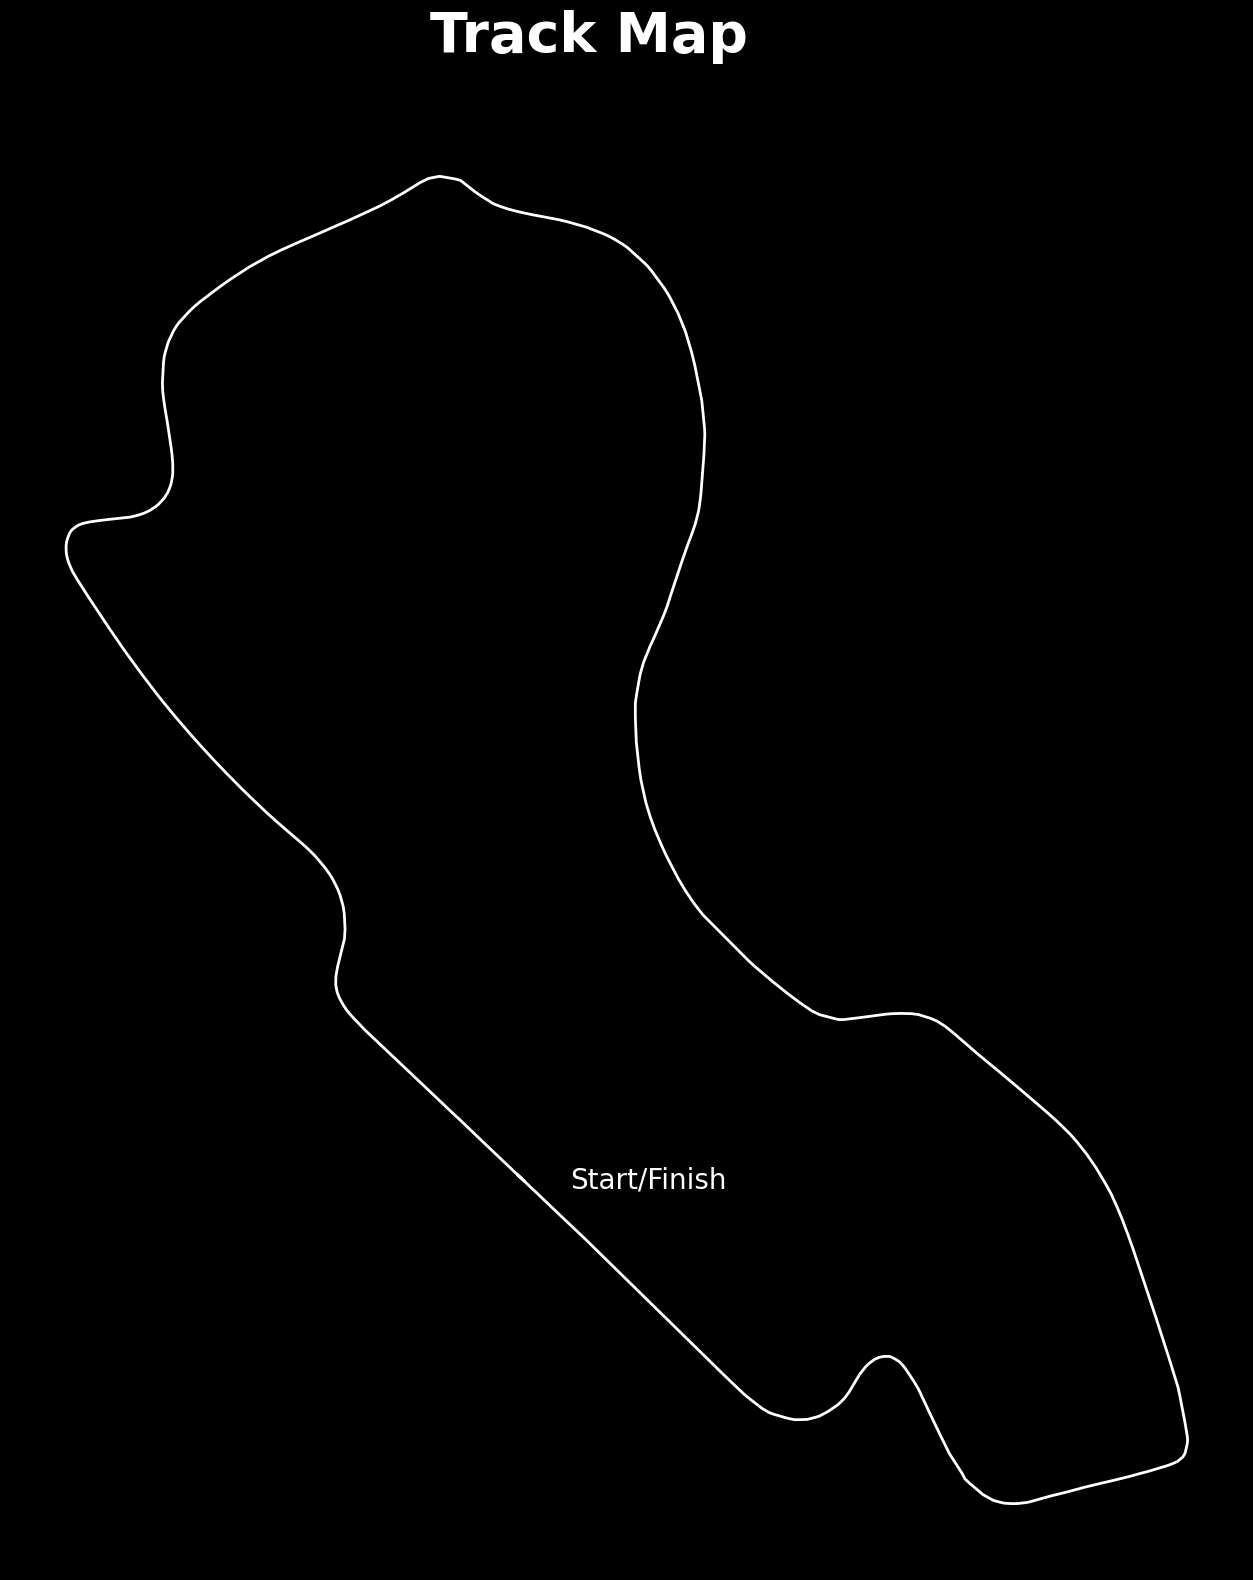

In [165]:
fig, ax = plt.subplots(sharex=True, sharey=True)
plt.suptitle("Track Map", size=title_font_size, y=0.90, fontweight='bold')

plt.style.use('dark_background')
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
ax.axis('off')
plt.subplots_adjust(left=0.1, right=0.95, top=0.85, bottom=0.12)

# Create background track line
ax.plot(idk_mate.telemetry['X'], idk_mate.telemetry['Y'], color='white', linestyle='-', linewidth=2)

# Set the aspect ratio to 'equal' to fit the track map perfectly
ax.set_aspect('equal', 'box')

# Find the y-coordinate of the starting point
start_y = segments[0][0][1]

# Calculate the width of the track
track_width = 9

# Set the start/finish line width to half of the track width
line_width = track_width / 2

# Draw the start/finish line
xmin = segments[0][0][0]
xmax = xmin + line_width
plt.hlines(y=start_y, xmin=xmin, xmax=xmax, color='red', linestyle='--', linewidth=2)

# Add the "Start/Finish" text
text_x = xmax + 600
text_y = start_y
plt.text(text_x, text_y, 'Start/Finish', fontsize=axis_label_font_size, verticalalignment='center')


    
# Save and show the plot
# plt.savefig(plot_filename, dpi=300, bbox_inches='tight')
plt.rcParams['figure.figsize'] = plot_size
plt.show()